# Problema de Negócio

Encontrar uma forma de melhorar a receita de um e-comerce, com base nos d

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split # divide dados de treino / teste
from sklearn.preprocessing import StandardScaler # Padronização
from sklearn.linear_model import LinearRegression # Regressão linear
from sklearn.linear_model import Ridge # Regressão Ridge
from sklearn.linear_model import Lasso # Regressão Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score # Métricas para regressão
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
# Carregando o dataset
dados = pd.read_csv('dados/dataset.csv')

In [5]:
dados.head()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075


In [6]:
dados.shape

(500, 5)

In [7]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [9]:
dados.sample(10)

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
180,3.863425,33.547748,10.735363,37.458375,476.191413
8,2.782758,33.448125,11.903757,36.874544,462.656519
261,4.835529,31.736636,10.748534,35.738707,496.933446
384,4.794312,33.672758,13.420546,37.763690,640.584062
311,3.606087,34.318927,13.402332,37.292045,585.931844
37,3.202806,31.936549,11.814128,37.145168,427.199385
125,1.914090,32.402371,10.875560,37.781143,338.319863
286,5.000243,31.283447,12.725677,35.965667,591.781089
407,1.130477,33.971722,12.284467,38.295725,385.095007
103,5.081210,33.076536,9.607315,36.493993,507.212569


# Análise Exploratória de Dados

In [10]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [11]:
dados.corr()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.060247,0.029143,-0.047582,0.809084
numero_medio_cliques_por_sessao,0.060247,1.000000,-0.027826,-0.034987,0.355088
tempo_total_logado_app,0.029143,-0.027826,1.000000,0.082388,0.499328
tempo_total_logado_website,-0.047582,-0.034987,0.082388,1.000000,-0.002641
valor_total_gasto,0.809084,0.355088,0.499328,-0.002641,1.000000


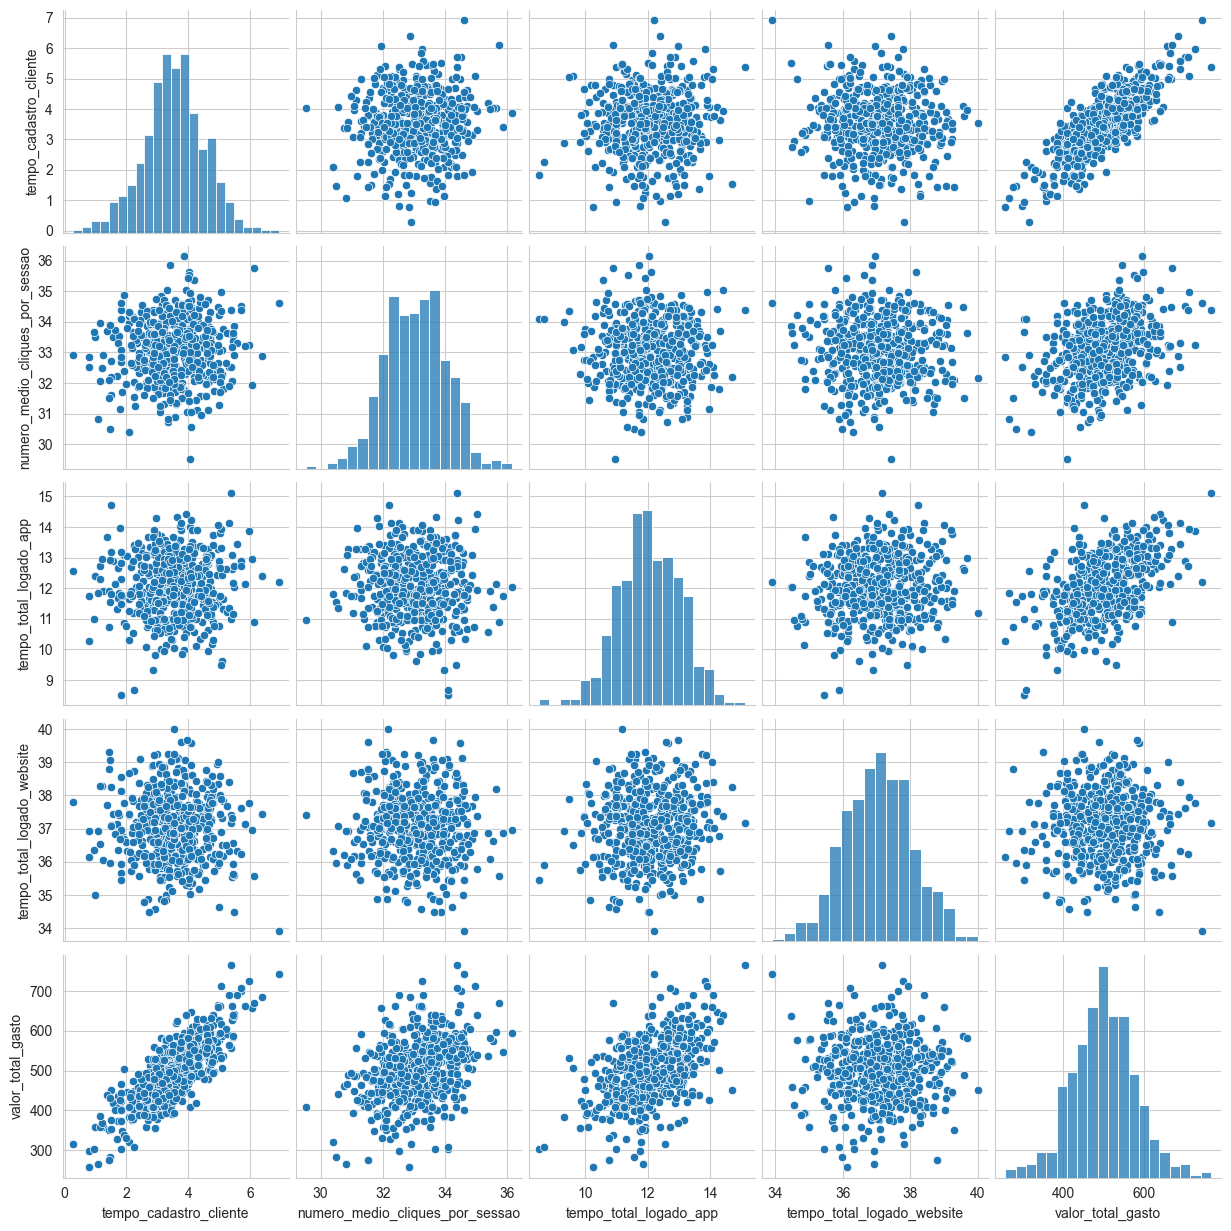

In [13]:
# Correlação visual
sns.pairplot(dados)

### Análise 1 - Relação entre tempo no web site com valor gasto

<Figure size 1800x1200 with 0 Axes>

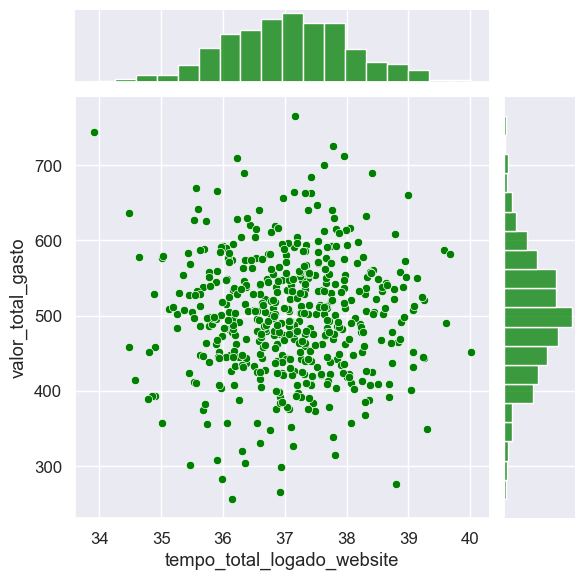

In [21]:
# Jointplot junta histograma e gráfico de dispersão

plt.figure(figsize = (18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados,
             x = 'tempo_total_logado_website',
             y = 'valor_total_gasto',
             color = 'green')

Não possui relação entre as variáveis, mesmo que embas estejam normalmente distribuidas

In [23]:
# Verificandoa a correlacao das duas
dados[['tempo_total_logado_website', 'valor_total_gasto']].corr()

,tempo_total_logado_website,valor_total_gasto
tempo_total_logado_website,1.000000,-0.002641
valor_total_gasto,-0.002641,1.000000


Realmente, não possui correlação

### Análise 2 - Relação entre tempo no App com valor gasto

<Figure size 1800x1200 with 0 Axes>

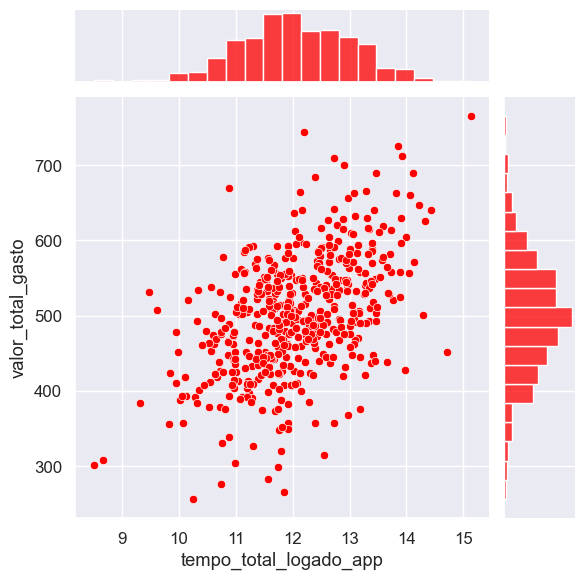

In [19]:
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados,
             x = 'tempo_total_logado_app',
             y = 'valor_total_gasto',
             color = 'red')

Com o gráfico acima, é possível verificar uma possivel correlação positiva, podemos deduzir que se o cliente passa mais tempo no app, maior será o total gasto

In [25]:
# Verificandoa a correlacao das duas
dados[['tempo_total_logado_app', 'valor_total_gasto']].corr()

,tempo_total_logado_app,valor_total_gasto
tempo_total_logado_app,1.000000,0.499328
valor_total_gasto,0.499328,1.000000


É possível verificar que de fato a correlação com o tempo logado no App é alta, beirando o 0.5

### Análise 3 - Relação entre tempo de cadastro com valor gasto

In [26]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

<Figure size 1800x1200 with 0 Axes>

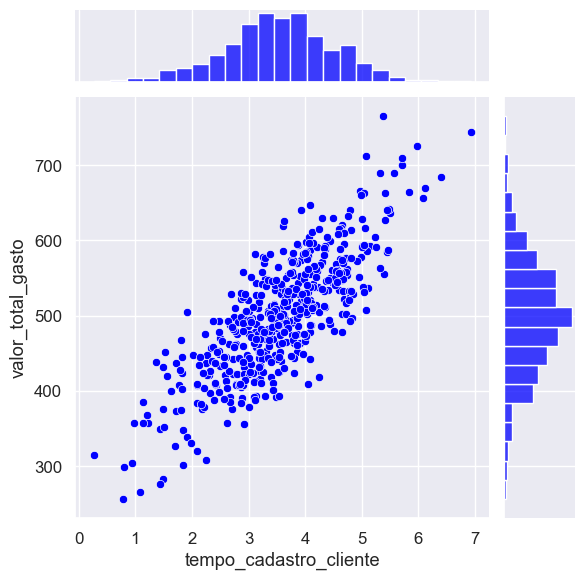

In [27]:
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados,
             x = 'tempo_cadastro_cliente',
             y = 'valor_total_gasto',
             color = 'blue')

###### Regessão Linear com seaborn (para visualização apenas)

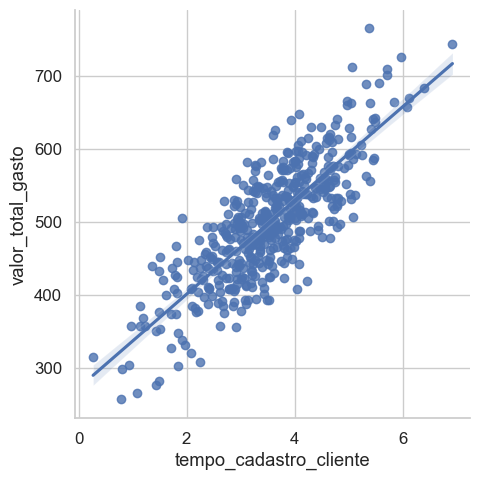

In [33]:
sns.set_style('whitegrid')
sns.lmplot(y = 'valor_total_gasto', x = 'tempo_cadastro_cliente', data = dados)

Novamente é possível observar uma forte correlação positiva entre essas duas variáveis. Ou seja, quanto mais antigo é o cliente, mais ele gasta na loja. 
As vezes é mais importante pensar em estratégias de retenção

In [28]:
dados[['tempo_cadastro_cliente', 'valor_total_gasto']].corr()

,tempo_cadastro_cliente,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.809084
valor_total_gasto,0.809084,1.000000


### Análise 4 - Relação entre tempo de cadastro com valor gasto

<Figure size 1800x1200 with 0 Axes>

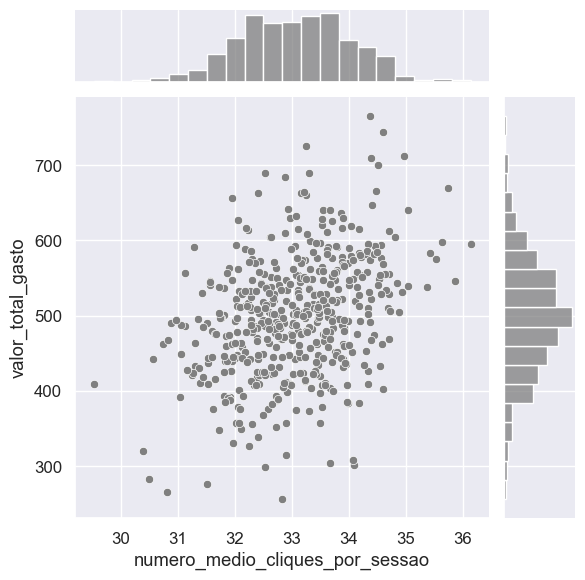

In [34]:
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados,
             x = 'numero_medio_cliques_por_sessao',
             y = 'valor_total_gasto',
             color = 'grey')

É possivel observar uma correlação entre as variaveis também, mesmo que menor 

In [31]:
dados[['numero_medio_cliques_por_sessao', 'valor_total_gasto']].corr()

,numero_medio_cliques_por_sessao,valor_total_gasto
numero_medio_cliques_por_sessao,1.000000,0.355088
valor_total_gasto,0.355088,1.000000


## ---------------------------------------

# Pré Processamento De Dados

In [35]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

##### Divisão de dados em treino e teste

In [36]:
# Variáveis de entrada (Variáveis preditoras)
X = dados[['tempo_cadastro_cliente',
          'numero_medio_cliques_por_sessao',
          'tempo_total_logado_app',
          'tempo_total_logado_website']]

In [37]:
# Variável de saída (Variável alvou o target)
y = dados['valor_total_gasto']

In [39]:
# Divisão em dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [42]:
len(X_treino)

350

In [43]:
len(X_teste)

150

### Padronização dos Dados 

###### Utilizando o sklearn

In [58]:
# Criando o objeto scaler
scaler = StandardScaler()

In [59]:
scaler.fit(X_treino)

StandardScaler()

##### Com oobjeto padronizador criado, vamos treinar o x_treino e x_teste

In [60]:
X_treino = scaler.transform(X_treino)

In [61]:
X_teste = scaler.transform(X_teste)

In [62]:
X_treino[:5]

array([[-0.21902935, -0.23735512,  0.33914084,  0.92765292],
       [ 1.8073082 ,  0.09393489,  1.05266311,  0.2388907 ],
       [-0.00962736, -0.47064535, -0.26005737,  0.81461639],
       [-0.06171807, -0.23157636, -0.19229742, -0.26198867],
       [-2.03669802, -1.54671013, -1.27813419,  1.65800995]])

In [63]:
X_teste[:5]

array([[-0.74134552,  0.35042401,  1.32428694,  0.85663193],
       [ 0.51634261,  0.33850011,  1.36472848,  0.1071885 ],
       [ 1.22462847, -0.84278168,  1.70184401,  0.88678948],
       [ 0.48199668, -0.30436824, -0.65228214, -1.76956776],
       [ 1.88519232, -0.14493923,  0.70658414, -1.44006612]])

### --------------------------------------------------------------------------------------------------

# Construção , Treinamento e Avaliação do Modelo 1 / Regressão Linear (Benchmark)

In [64]:
# Criação do Modelo 1

modelo_v1 = LinearRegression()

In [65]:
# Treinamento
modelo_v1.fit(X_treino, y_treino)

LinearRegression()

In [66]:
print(f"Coeficiente: : {modelo_v1.coef_}")

Coeficiente: : [63.74220716 26.23901606 38.57185551  0.6847366 ]


In [70]:
# Coeficientes das variáveis preditorias
df_coef = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
df_coef

# Para melhor visualização dos coeficientes

,Coeficiente
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


### Avaliação do modelo 1

In [71]:
# Previsões com dados de teste
pred_v1 = modelo_v1.predict(X_teste)

In [72]:
pred_v1[:10]

array([513.06429807, 593.96597774, 621.6550031 , 495.82353395,
       642.08919639, 615.61800045, 592.1273355 , 493.61084354,
       457.58835597, 532.03644608])

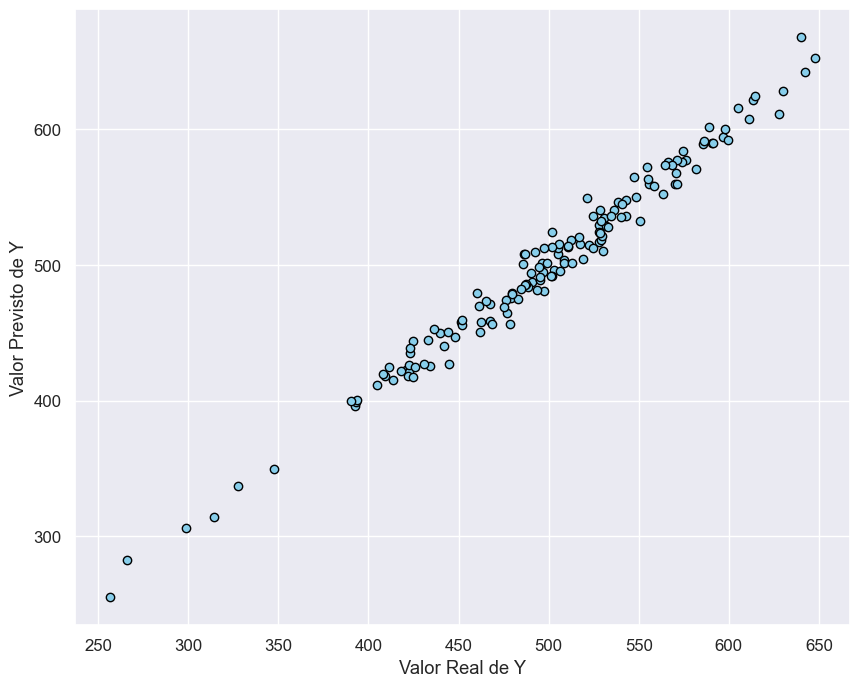

In [73]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v1, color = "skyblue", edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

### Métricas

In [75]:
# Valor médio gasto pelos clientes
dados['valor_total_gasto'].mean()

499.31403826080003

In [76]:
# Valor mínimo
dados['valor_total_gasto'].min()

256.6705823

In [77]:
# Valor máximo
dados['valor_total_gasto'].max()

765.5184619

In [78]:
# MAE - Erro Médio Absoluto
mean_absolute_error(y_teste, pred_v1)

7.762418645778983


- O MAE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 7,76 reais, o que é um valor pequeno, comparado ao valor médio gasto por cliente

In [79]:
# MSE - Erro Quadrático Médio
mean_squared_error(y_teste, pred_v1)

94.9565430843867

In [80]:
# RMSE - Raiz Quadrada do Erro Quadrático Médio
np.sqrt(mean_squared_error(y_teste, pred_v1))

9.74456479707466


- O RMSE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 9,74 reais, o que é um valor pequeno, comparado ao valor médio gasto por cliente

In [82]:
# Coeficiente R2 - vai de 0 a 1
r2_score(y_teste, pred_v1)

0.9813622791776302

In [84]:
# Variancia Explicada
explained_variance_score(y_teste, pred_v1)

0.9817449183428639


- O modelo se mostrou capaz de explicar 98% da variância dos dados, o que é excelente.
- O coeficiente R2 de 98% e as outras métricas demonstram que este é um modelo muito bom.

### Residuos

C:\Users\alyss\AppData\Local\Temp\ipykernel_12236\3174476490.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_teste - pred_v1), #Valor real de Y, menos a previsão de Y


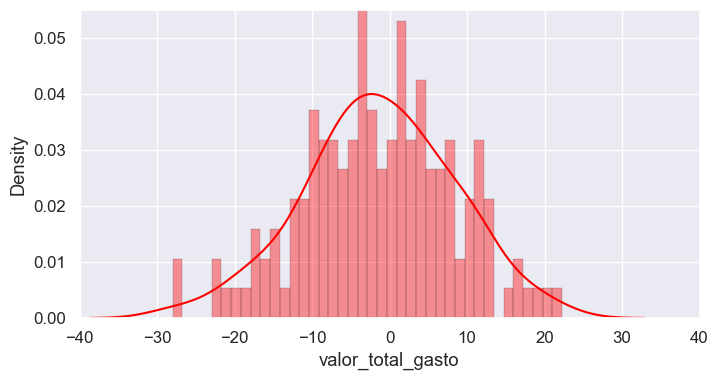

In [89]:
# Plot 
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v1), #Valor real de Y, menos a previsão de Y
                 bins = 40,
                 color = 'red',
                 hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0,0.055));

#### --------------------------------------------------------

# Construção , Treinamento e Avaliação do Modelo 2 / Regressão Ridge

###### Acrescenta mais um elemento matemático para a formula da regressão 

In [92]:
# Criação do modelo
modelo_v2 = Ridge(alpha = 1.0)

In [94]:
# Treinamento
modelo_v2.fit(X_treino, y_treino)

Ridge()

In [95]:
print(f"Coeficiente: {modelo_v2.coef_}")

Coeficiente: [63.57245999 26.17198131 38.46758178  0.68013543]


In [96]:
# Coeficinetes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v2.coef_, X.columns, columns = ['coeficiente'])
df_coef

,coeficiente
tempo_cadastro_cliente,63.572460
numero_medio_cliques_por_sessao,26.171981
tempo_total_logado_app,38.467582
tempo_total_logado_website,0.680135


In [97]:
pred_v2 = modelo_v2.predict(X_teste)

In [98]:
pred_v2[:10]

array([513.02461894, 593.71284026, 621.32208364, 495.83827761,
       641.71185412, 615.30802007, 591.87884788, 493.61867235,
       457.70805605, 531.9426755 ])

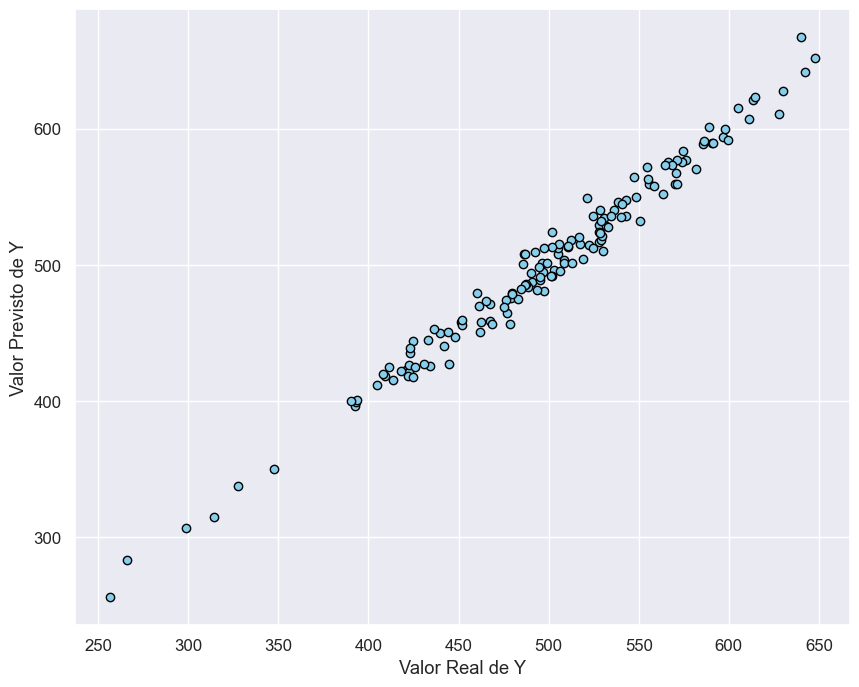

In [99]:
# Plot de comparacao de valor real de Y com valor previsto
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v2, color = "skyblue", edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [100]:
# MAE
mean_absolute_error(y_teste, pred_v2)

7.764151148981959

In [101]:
# MSE
mean_squared_error(y_teste, pred_v2)

94.93731602493462

In [102]:
# RMSE - raiz quadrada do MSE
np.sqrt(mean_squared_error(y_teste, pred_v2))

9.743578194120198

In [103]:
# Coeficiente R2
r2_score(y_teste, pred_v2)

0.981366052994101

In [104]:
# Variância Explicada
explained_variance_score(y_teste, pred_v2)

0.9817472659016085

#### Residuos

C:\Users\alyss\AppData\Local\Temp\ipykernel_12236\3456518587.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_teste - pred_v2), #Valor real de Y, menos a previsão de Y


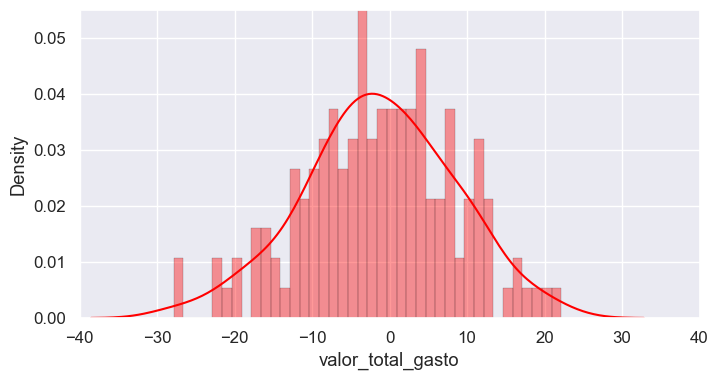

In [105]:
# Plot 
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v2), #Valor real de Y, menos a previsão de Y
                 bins = 40,
                 color = 'red',
                 hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0,0.055));

#### --------------------------------------------------------

# Construção , Treinamento e Avaliação do Modelo 3 / Regressão LASSO

In [107]:
# Construção
modelo_v3 = Lasso(alpha = 1.0)

In [108]:
modelo_v3.fit(X_treino, y_treino)

Lasso()

In [110]:
print(f"Coeficiente: {modelo_v3.coef_}")

Coeficiente: [62.86344076 25.18747244 37.62149243  0.        ]


In [111]:
# Coeficinetes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v3.coef_, X.columns, columns = ['coeficiente'])
df_coef

,coeficiente
tempo_cadastro_cliente,62.863441
numero_medio_cliques_por_sessao,25.187472
tempo_total_logado_app,37.621492
tempo_total_logado_website,0.000000


In [113]:
# Previsões 
pred_v3 = modelo_v3.predict(X_teste)
pred_v3[:10]

array([511.50216083, 591.78590214, 619.24047552, 497.55162062,
       640.89951717, 614.42803424, 590.05764493, 494.76617949,
       459.30498489, 529.64197449])

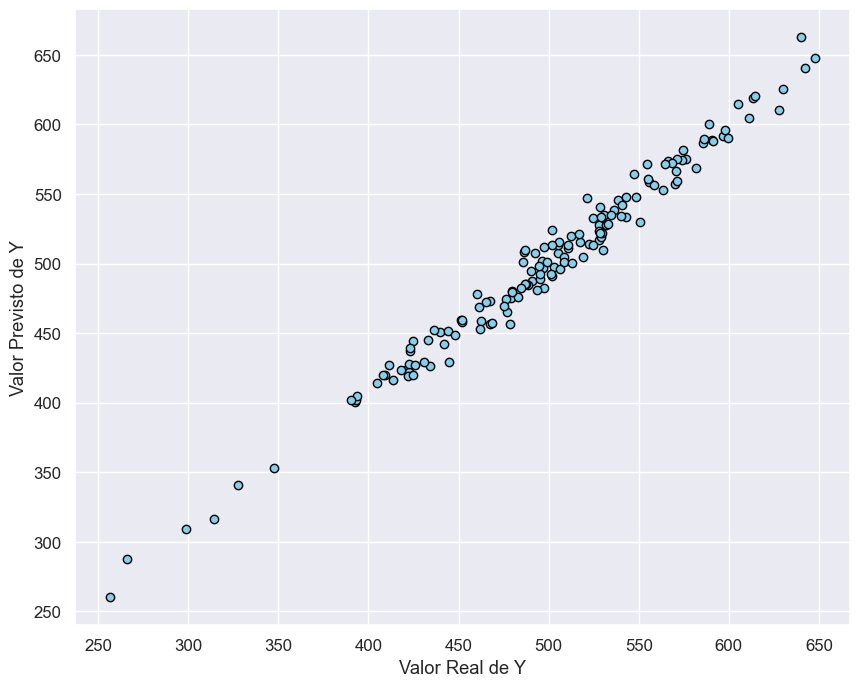

In [114]:
# Plot de comparacao de valor real de Y com valor previsto
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v3, color = "skyblue", edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [136]:
# MAE
mean_absolute_error(y_teste, pred_v3)

7.788504696951071

In [116]:
# MSE
mean_squared_error(y_teste, pred_v3)

96.05606348970674

In [117]:
# RMSE - raiz quadrada do MSE
np.sqrt(mean_squared_error(y_teste, pred_v3))

9.80081953153443

In [132]:
# Coeficiente R2
r2_score(y_teste, pred_v3)

0.981146469358873

In [129]:
# Variância Explicada
explained_variance_score(y_teste, pred_v3)

0.9815600649101045

C:\Users\alyss\AppData\Local\Temp\ipykernel_12236\2497126399.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_teste - pred_v3), #Valor real de Y, menos a previsão de Y


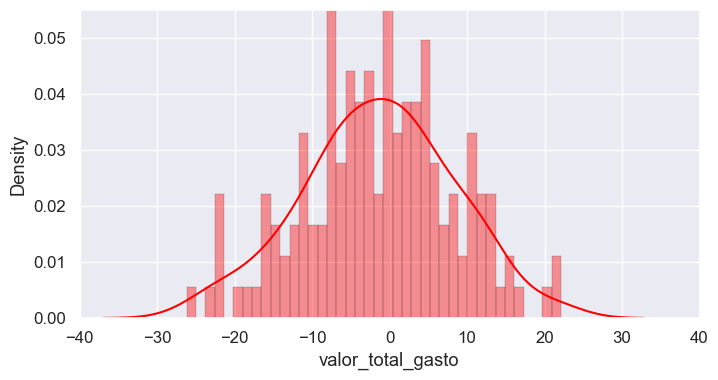

In [124]:
# Plot 
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v3), #Valor real de Y, menos a previsão de Y
                 bins = 40,
                 color = 'red',
                 hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0,0.055));

# --------------------------------------

# Seleção do Modelo

O modelo 3 apresentou uma taxa de erro (RMSE) levemente maior e pode ser descartado.
Os modelos 1 e 2 ficaram muito próximos, nesse caso devemos escolher o mais simples.
###### O modelo escolhido foi o 1

# Conclusão

In [137]:
dados.head()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075


In [139]:
# Coeficientes
df_coef_final = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
df_coef_final

,Coeficiente
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


### Interpretações dos Coeficientes

- Mantendo todos os outros revursos fixo, um aumento de 1 unidade no tempo de cadastro está associado a um aumento de R$ 63,74 no valor total gasto por cliente por mês.

- Mantendo todos os outros recursos fixos, um aumento de 1 unidade no número médio de cliques por sessão está asspcoadp a um aumento de R$ 26,23 no valor total gasto por cliente por mês

- Mantendo todos os outros gastos fixos, um aumento de 1 unidade no tempo total logado na app está associado a um aumento de R$ 38,57 no valor total gasto por cliente por mês

- Mantendo todos os outros gastos fixos, um aumento de 1 unidade no tempo total logado no website está associado a um aumento de R$ 0,68 no valor total gasto por cliente por mês

Podemos ver que será mais lucrativo para a empresa atualizar a sua versão para App.

É importante criar, inclusive, programas que fidelizem o cliente por mais tempo, haja vista o retorno financeiro que isso acarretaria, haja vista que a previsão de gastos totais dos clientes aumentam R$ 63,74 a cada ano de fidelidade


Não compensa investir no website